In [269]:
import numpy as np
import pandas as pd
import math
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

In [270]:
#df= pd.read_csv('anonymized-curriculum-access.csv')
#df=pd.DataFrame(df)

In [271]:
def evaluate(actual, predictions, output=True):
    mse = metrics.mean_squared_error(actual, predictions)
    rmse = math.sqrt(mse)

    if output:
        print('MSE:  {}'.format(mse))
        print('RMSE: {}'.format(rmse))
    else:
        return mse, rmse    

def plot_and_eval(predictions, actual, metric_fmt='{:.2f}', linewidth=4):
    if type(predictions) is not list:
        predictions = [predictions]

    plt.figure(figsize=(16, 8))
    plt.plot(train,label='Train')
    plt.plot(test, label='Test')

    for yhat in predictions:
        mse, rmse = evaluate(actual, yhat, output=False)        
        label = f'{yhat.name}'
        if len(predictions) > 1:
            label = f'{label} -- MSE: {metric_fmt} RMSE: {metric_fmt}'.format(mse, rmse)
        plt.plot(yhat, label=label, linewidth=linewidth)

    if len(predictions) == 1:
        label = f'{label} -- MSE: {metric_fmt} RMSE: {metric_fmt}'.format(mse, rmse)
        plt.title(label)

    plt.legend(loc='best')
    plt.show()    

#### Wrangle Data
#### Acquire

In [272]:
#colnames=[{0:"date", 1:"time", 2:"page", 3:"num1", 4:"num2", 5:"ip"}]
df_orig = pd.read_csv('anonymized-curriculum-access.csv',
                 header=None,
                 sep= " "
)



df = df_orig
df.head()

,0,1,2,3,4,5
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [273]:
df = df.rename(columns={0:"date", 1:"time", 2:"page", 3:"c1", 4:"c2", 5:"ip"})
df.head(1)

,date,time,page,c1,c2,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61


In [274]:
df=pd.DataFrame(df)

df.describe()

,c1,c2
count,399195.000000,372441.000000
mean,268.794667,26.912649
std,147.587312,7.846146
min,1.000000,1.000000
25%,157.000000,23.000000
50%,288.000000,27.000000
75%,392.000000,31.000000
max,543.000000,52.000000


In [276]:
df.set_index(df['date'])
df.describe()

,c1,c2
count,399195.000000,372441.000000
mean,268.794667,26.912649
std,147.587312,7.846146
min,1.000000,1.000000
25%,157.000000,23.000000
50%,288.000000,27.000000
75%,392.000000,31.000000
max,543.000000,52.000000


In [277]:
df.date = pd.to_datetime(df.date)
df = df.set_index("date")
df = df.drop(pd.date_range('2019-11-04', '2019-11-19'))
df.describe()

,c1,c2
count,386922.000000,360380.000000
mean,263.427743,26.485554
std,145.012240,7.362868
min,1.000000,1.000000
25%,153.000000,23.000000
50%,277.000000,26.000000
75%,383.000000,31.000000
max,514.000000,51.000000


#### Prep and clean

In [278]:
#Clean up nulls
df.isnull().sum()

time        0
page        0
c1          0
c2      26542
ip          0
dtype: int64

In [280]:
df.head()

,time,page,c1,c2,ip
date,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [281]:
df.c1.describe()

count    386922.000000
mean        263.427743
std         145.012240
min           1.000000
25%         153.000000
50%         277.000000
75%         383.000000
max         514.000000
Name: c1, dtype: float64

In [282]:
df.c2.describe()

count    360380.000000
mean         26.485554
std           7.362868
min           1.000000
25%          23.000000
50%          26.000000
75%          31.000000
max          51.000000
Name: c2, dtype: float64

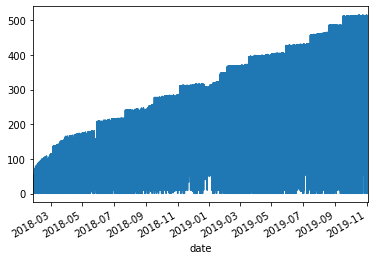

In [283]:
df.c1.plot()
plt.show()

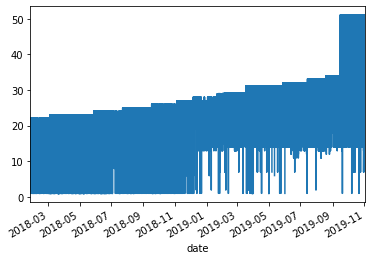

In [284]:
df.c2.plot()
plt.show()

### working on column 1

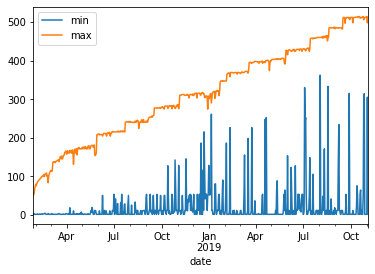

In [285]:
df.c1.resample("D").min().plot(label="min")
df.c1.resample("D").max().plot(label="max")
plt.legend()
plt.show()

##### column2

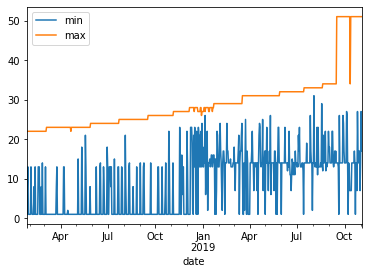

In [290]:
df.c2.resample("D").min().plot(label="min")
df.c2.resample("D").max().plot(label="max")
plt.legend()
plt.show()

In [291]:
df.head()

,time,page,c1,c2,ip
date,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [292]:
df.c1.head()

date
2018-01-26    1
2018-01-26    1
2018-01-26    1
2018-01-26    1
2018-01-26    2
Name: c1, dtype: int64

In [308]:
dfc1=df.groupby(df['c1']).count()

In [311]:
dfc2=df.groupby(df['c2']).count()

In [315]:
dfc1

,time,page,c2,ip
c1,,,,
1,4167,4167,4167,4167
2,1541,1541,1541,1541
3,1562,1562,1562,1562
4,692,692,692,692
5,1701,1701,1701,1701
6,1408,1408,1408,1408
7,1803,1803,1803,1803
8,483,483,483,483
9,585,585,585,585


#### Split into train/test

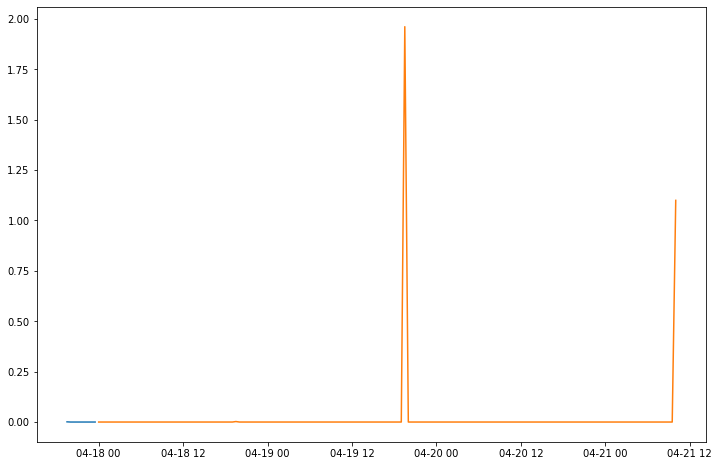

In [112]:
start_date_train = df_ts_size.head(1).index[0]
end_date_train = '2019-04-17 23:30:00'
start_date_test = '2019-04-18 00:00:00'

train = df_ts_size[:end_date_train]
test = df_ts_size[start_date_test:]

plt.figure(figsize=(12, 8))
plt.plot(train)
plt.plot(test)
plt.show()

#### SMA - Simple Moving Average

In [113]:
# Calculating the short-window simple moving average
short_rolling = train.rolling(window=12).mean()

# Calculating the long-window simple moving average
long_rolling = train.rolling(window=24).mean()

#### Plot the 2 window sizes for the SMA:

Text(0, 0.5, 'Size (MB)')

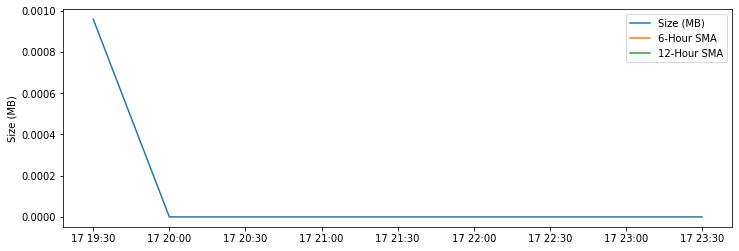

In [114]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(train.index, 
        train,
        label='Size (MB)')

ax.plot(short_rolling.index, 
        short_rolling, 
        label = '6-Hour SMA')
ax.plot(long_rolling.index, 
        long_rolling, 
        label = '12-Hour SMA')

ax.legend(loc='best')
ax.set_ylabel('Size (MB)')
# ax.xaxis.(rotate=90)
# ax.xaxis.set_major_formatter(my_datetime_fmt)

#### Exponential Moving Average

In [115]:
# Using Pandas to calculate a 2 hour span EMA. 
# adjust=False specifies that we are interested in the 
# recursive calculation mode.
ema_short = train.ewm(span=12, adjust=False).mean()
ema_short[0:3]

ema_long = train.ewm(span=12, adjust=False).mean()
ema_long[0:3]

2019-04-17 19:30:00+00:00    0.000958
2019-04-17 20:00:00+00:00    0.000811
2019-04-17 20:30:00+00:00    0.000686
Freq: 30T, Name: size_mb, dtype: float64

In [116]:
span = 24
ema_long = train.ewm(span=span, adjust=False).mean()
midband = ema_long[-1]
ub = midband + ema_long[-24:-1].std()*3
lb = midband - ema_long[-24:-1].std()*3

#### Compare SMA with EMA:

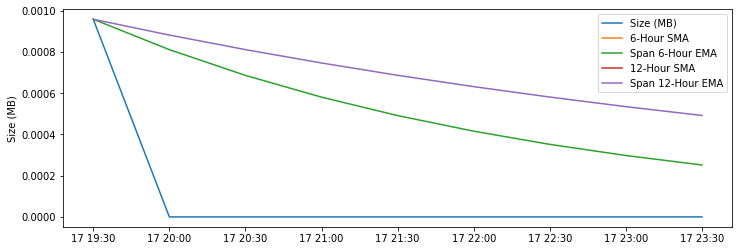

In [117]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(train.index, 
        train,
        label='Size (MB)')

ax.plot(short_rolling.index, 
        short_rolling, 
        label = '6-Hour SMA')
ax.plot(long_rolling.index, 
        ema_short, 
        label = 'Span 6-Hour EMA')
ax.plot(long_rolling.index, 
        long_rolling, 
        label = '12-Hour SMA')
ax.plot(long_rolling.index, 
        ema_long, 
        label = 'Span 12-Hour EMA')

ax.legend(loc='best')
ax.set_ylabel('Size (MB)')

yhat = pd.DataFrame(dict(actual=test))

#### Forecast using the EMA

In [118]:
span = 24
ema_long = train.ewm(span=span, adjust=False).mean()
midband = ema_long[-1]
ub = midband + ema_long[-24:-1].std()*3
lb = midband - ema_long[-24:-1].std()*3

yhat['moving_avg_forecast'] = midband

#### Compute the '%b' for each record:

In [119]:
# compute the absolute error:
yhat['error'] = abs(yhat.actual - yhat.moving_avg_forecast)

# compute the mean of the absolute error:
# yhat.error.median()

# compute upper band and lower band using IQR with weight of 3

yhat['pct_b'] = (yhat.actual-lb)/(ub-lb)

#### Extract the anomalies:

In [120]:
yhat[yhat.pct_b > 1]

,actual,moving_avg_forecast,error,pct_b
2019-04-18 19:30:00+00:00,0.002441,0.000492,0.001950,2.691088
2019-04-19 19:30:00+00:00,1.961066,0.000492,1.960574,2204.017316
2019-04-21 10:00:00+00:00,1.099591,0.000492,1.099099,1235.793360


#### Plot

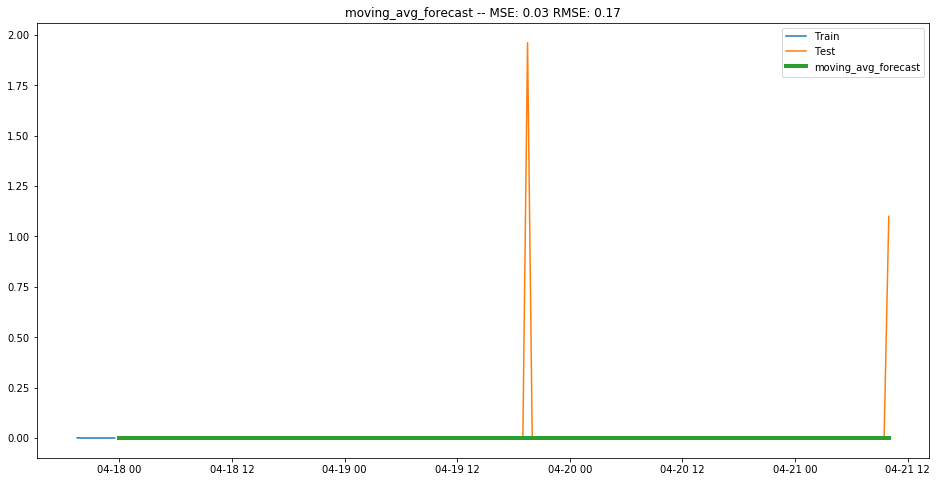

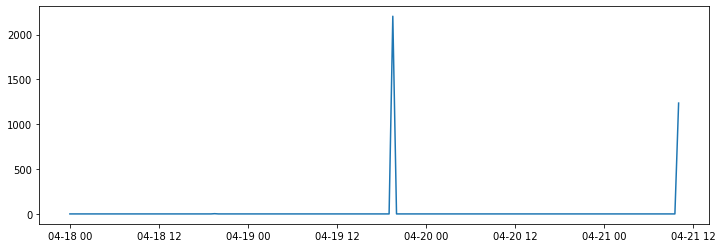

In [121]:
plot_and_eval(yhat.moving_avg_forecast, actual=test)
plt.figure(figsize=(12,4))
plt.plot(yhat.pct_b)